# Connect to your Driver

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/GG Colab/VGG16

/content/drive/MyDrive/GG Colab/VGG16


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('CO2 dataset.csv')

In [5]:
data['Year'] = pd.to_datetime(data['Year'])
data['CO2'] = data['CO2'].interpolate()

In [6]:
startTime = pd.Timestamp('1970-01-01 00:00:00')
timeIntervals = pd.date_range(startTime, periods=len(data), freq='H')
data['Year'] = timeIntervals

<ipython-input-6-cfc404d9a9bf>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timeIntervals = pd.date_range(startTime, periods=len(data), freq='H')


In [7]:
data.head(30)

,Year,CO2
0,1970-01-01 00:00:00,0.00568
1,1970-01-01 01:00:00,0.00561
2,1970-01-01 02:00:00,0.00555
3,1970-01-01 03:00:00,0.00548
4,1970-01-01 04:00:00,0.00542
5,1970-01-01 05:00:00,0.00536
6,1970-01-01 06:00:00,0.00529
7,1970-01-01 07:00:00,0.00523
8,1970-01-01 08:00:00,0.00517
9,1970-01-01 09:00:00,0.00511


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    215 non-null    datetime64[ns]
 1   CO2     215 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


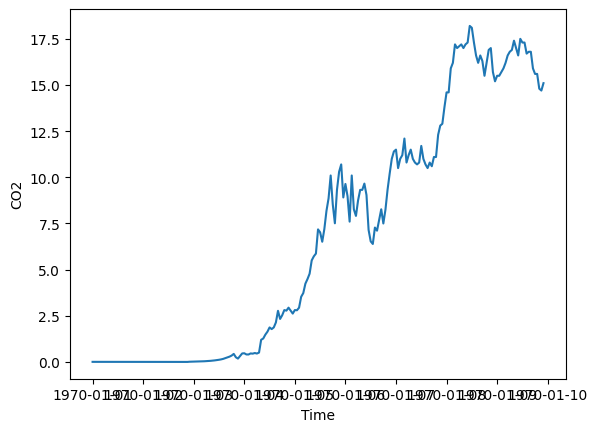

In [9]:
fig, ax = plt.subplots()
ax.plot(data['Year'], data['CO2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

#Dùng nội suy để xử lý các giá trị NaN

In [10]:
def getValues(data):
  i = 1
  while i < 5:
    data[f'CO2_{i}'] = data['CO2'].shift(-i)
    i += 1
  data['target'] = data['CO2'].shift(-i)

  data.dropna(axis=0, inplace=True)
  return data

In [33]:
data = getValues(data)
n = len(data)
trainSize = 0.8
X = data.drop(['Year', 'target'], axis=1)
y = data['target']
Xtrain = X[:int(n*trainSize)]
ytrain = y[:int(n*trainSize)]
Xtest = X[int(n*trainSize):]
ytest = y[int(n*trainSize):]
Xtrain.shape

(152, 5)

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [44]:
Xtrain, ytrain, Xtest, ytest = np.array(Xtrain), np.array(ytrain), np.array(Xtest), np.array(ytest)

In [ ]:
Model = LinearRegression()
Model.fit(Xtrain, ytrain)
yPredict = Model.predict(Xtest)

In [46]:
print(f'R2 Score: {r2_score(ytest, yPredict)}')
print(f'Mean Squared Error: {mean_squared_error(ytest, yPredict)}')
print(f'Mean Absolute Error: {mean_absolute_error(ytest, yPredict)}')

R2 Score: -2.5111968835870107
Mean Squared Error: 20.243752137631546
Mean Absolute Error: 3.9423236842105243


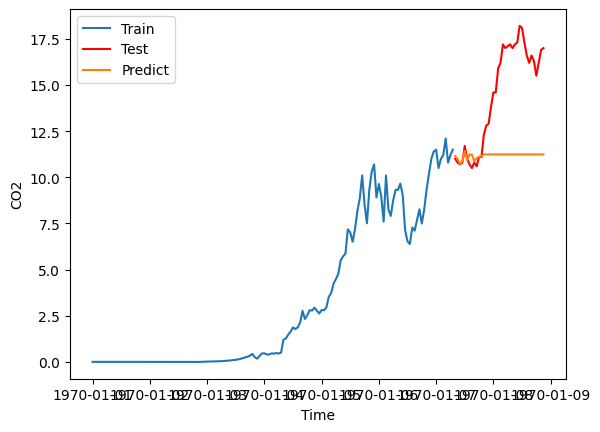

In [47]:
fig, ax = plt.subplots()
ax.plot(data['Year'][:int(n*trainSize)], data['CO2'][:int(n*trainSize)], label='Train')
ax.plot(data['Year'][int(n*trainSize):], data['CO2'][int(n*trainSize):], label='Test', color='r')
ax.plot(data['Year'][int(n*trainSize):], yPredict, label='Predict')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

In [62]:
data

,Year,CO2,CO2_1,CO2_2,CO2_3,CO2_4,target
0,1970-01-01 00:00:00,0.00568,0.00561,0.00555,0.00548,0.00542,0.00536
1,1970-01-01 01:00:00,0.00561,0.00555,0.00548,0.00542,0.00536,0.00529
2,1970-01-01 02:00:00,0.00555,0.00548,0.00542,0.00536,0.00529,0.00523
3,1970-01-01 03:00:00,0.00548,0.00542,0.00536,0.00529,0.00523,0.00517
4,1970-01-01 04:00:00,0.00542,0.00536,0.00529,0.00523,0.00517,0.00511
...,...,...,...,...,...,...,...
180,1970-01-08 12:00:00,18.10000,17.30000,16.60000,16.20000,16.60000,16.30000
181,1970-01-08 13:00:00,17.30000,16.60000,16.20000,16.60000,16.30000,15.50000
182,1970-01-08 14:00:00,16.60000,16.20000,16.60000,16.30000,15.50000,16.20000
183,1970-01-08 15:00:00,16.20000,16.60000,16.30000,15.50000,16.20000,16.90000
